In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [37]:
np.set_printoptions(precision=20, suppress=True)

my_data = np.genfromtxt('ML-CUP24-TR.csv', delimiter=',')
X = my_data[:, 1:13]
y = my_data[:, 13:16]
print(X.shape, y.shape)

#print(X)
#print(y)

# Suddividi i dati in train (60%) e temp (40%) (HOLDOUT)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Suddividi temp in validation (20%) e test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizza i dati
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

# Funzione di attivazione RBF con TensorFlow
def rbf_activation(x, centers, gamma=1.0):
    # Calcola la distanza euclidea tra l'input e i centri
    diff = x[:, np.newaxis, :] - centers
    dist_sq = tf.reduce_sum(tf.square(diff), axis=-1)  # Usa tf.reduce_sum invece di np.sum
    return tf.exp(-gamma * dist_sq)

# Creare il modello
def build_rbf_model(input_dim, output_dim, n_centers, gamma, learning_rate):
    model = models.Sequential()

    # Layer di input: utilizza 'shape' invece di 'input_dim'
    model.add(layers.InputLayer(shape=(input_dim,)))

    # Layer nascosta con attivazione RBF (calcola distanza dal centro)
    centers = tf.Variable(np.random.randn(n_centers, input_dim), dtype=tf.float32)  # Centri randomici
    model.add(layers.Lambda(lambda x: rbf_activation(x, centers, gamma)))

    # Layer di output con una dimensione pari al numero di target (3 in questo caso: x, y, z)
    model.add(layers.Dense(output_dim))

    # Optimizer
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

    return model

(250, 12) (250, 3)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9992 - mse: 0.9992 - val_loss: 0.8745 - val_mse: 0.8745
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8897 - mse: 0.8897 - val_loss: 0.7383 - val_mse: 0.7383
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7187 - mse: 0.7187 - val_loss: 0.6278 - val_mse: 0.6278
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.5409 - val_mse: 0.5409
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5114 - mse: 0.5114 - val_loss: 0.4747 - val_mse: 0.4747
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3505 - mse: 0.3505 - val_loss: 0.4250 - val_mse: 0.4250
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3548 - mse: 0.3548 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3336 - mse: 0.3336 - val_loss: 0.3582 - val_mse: 0.3582
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3270 - mse: 0.3270 -

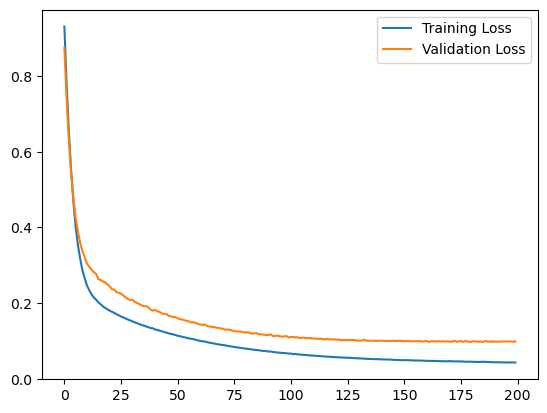

Test Loss: 0.043277300894260406
Validation Loss: 0.09755408018827438


In [319]:
# Parametri fissi
input_dim = 12
output_dim = 3

n_centers = 160 #Lower value more flat
gamma = 0.16 #Higher value more flat - Lower value lower val_loss
batch_size = 17 #Higher more flat - low value low test_loss
learning_rate = 0.004 #Lower value more flat - high value flatline - high value low test_loss high val_loss

# Creazione del modello
rbf_model = build_rbf_model(input_dim, output_dim, n_centers, gamma, learning_rate)

# Addestramento del modello
history = rbf_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Visualizzazione delle prestazioni
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

test_loss = min(history.history['loss'])
val_loss = min(history.history['val_loss'])
print(f"Test Loss: {test_loss}")
print(f"Validation Loss: {val_loss}")

In [ ]:
n_centers = 200
gamma = 0.2
batch_size = 14
learning_rate = 0.0014
Test Loss: 0.06445634365081787
Validation Loss: 0.11622121930122375

n_centers = 200 #Lower value more flat
gamma = 0.3 #Higher value more flat
batch_size = 14
learning_rate = 0.006 #Lower value more flat
Test Loss: 0.043476976454257965
Validation Loss: 0.10901372879743576

n_centers = 200 #Lower value more flat
gamma = 0.2 #Higher value more flat
batch_size = 30 #Higher more flat
learning_rate = 0.004 #Lower value more flat
Test Loss: 0.04333050549030304
Validation Loss: 0.10577195882797241

n_centers = 200 #Lower value more flat
gamma = 0.2 #Higher value more flat
batch_size = 15 #Higher more flat
learning_rate = 0.0085 #Lower value more flat - high value flatline
Test Loss: 0.03624385967850685
Validation Loss: 0.11026392877101898

n_centers = 200 #Lower value more flat
gamma = 0.2 #Higher value more flat
batch_size = 15 #Higher more flat
learning_rate = 0.0075 #Lower value more flat - high value flatline
Test Loss: 0.035065483301877975
Validation Loss: 0.09955853223800659

# REAL UNDER 0.1 VAL_LOSS
n_centers = 200 #Lower value more flat
gamma = 0.2 #Higher value more flat
batch_size = 17 #Higher more flat
learning_rate = 0.005 #Lower value more flat - high value flatline
Test Loss: 0.04240844398736954
Validation Loss: 0.09722490608692169 

# VERY GOOD RESULTS BUT BAD GRAPH
n_centers = 200 #Lower value more flat
gamma = 0.1 #Higher value more flat
batch_size = 17 #Higher more flat
learning_rate = 0.005 #Lower value more flat - high value flatline
Test Loss: 0.039354585111141205
Validation Loss: 0.08351566642522812

# GOOD RESULTS AND GOOD GRAPH, LITTLE FLATLINE
n_centers = 200 #Lower value more flat
gamma = 0.2 #Higher value more flat
batch_size = 13 #Higher more flat
learning_rate = 0.005 #Lower value more flat - high value flatline
Test Loss: 0.03934277966618538
Validation Loss: 0.0920468121767044

n_centers = 170 #Lower value more flat
gamma = 0.16 #Higher value more flat - Lower value lower val_loss
batch_size = 17 #Higher more flat - low value low test_loss
learning_rate = 0.004 #Lower value more flat - high value flatline - high value low test_loss high val_loss
Test Loss: 0.042399730533361435
Validation Loss: 0.08964406698942184